In [2]:
!pip install missingno
import numpy as np 
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("C:/Users/gunja/Downloads/Electronic_sales_Sep2023-Sep2024.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

<Axes: >

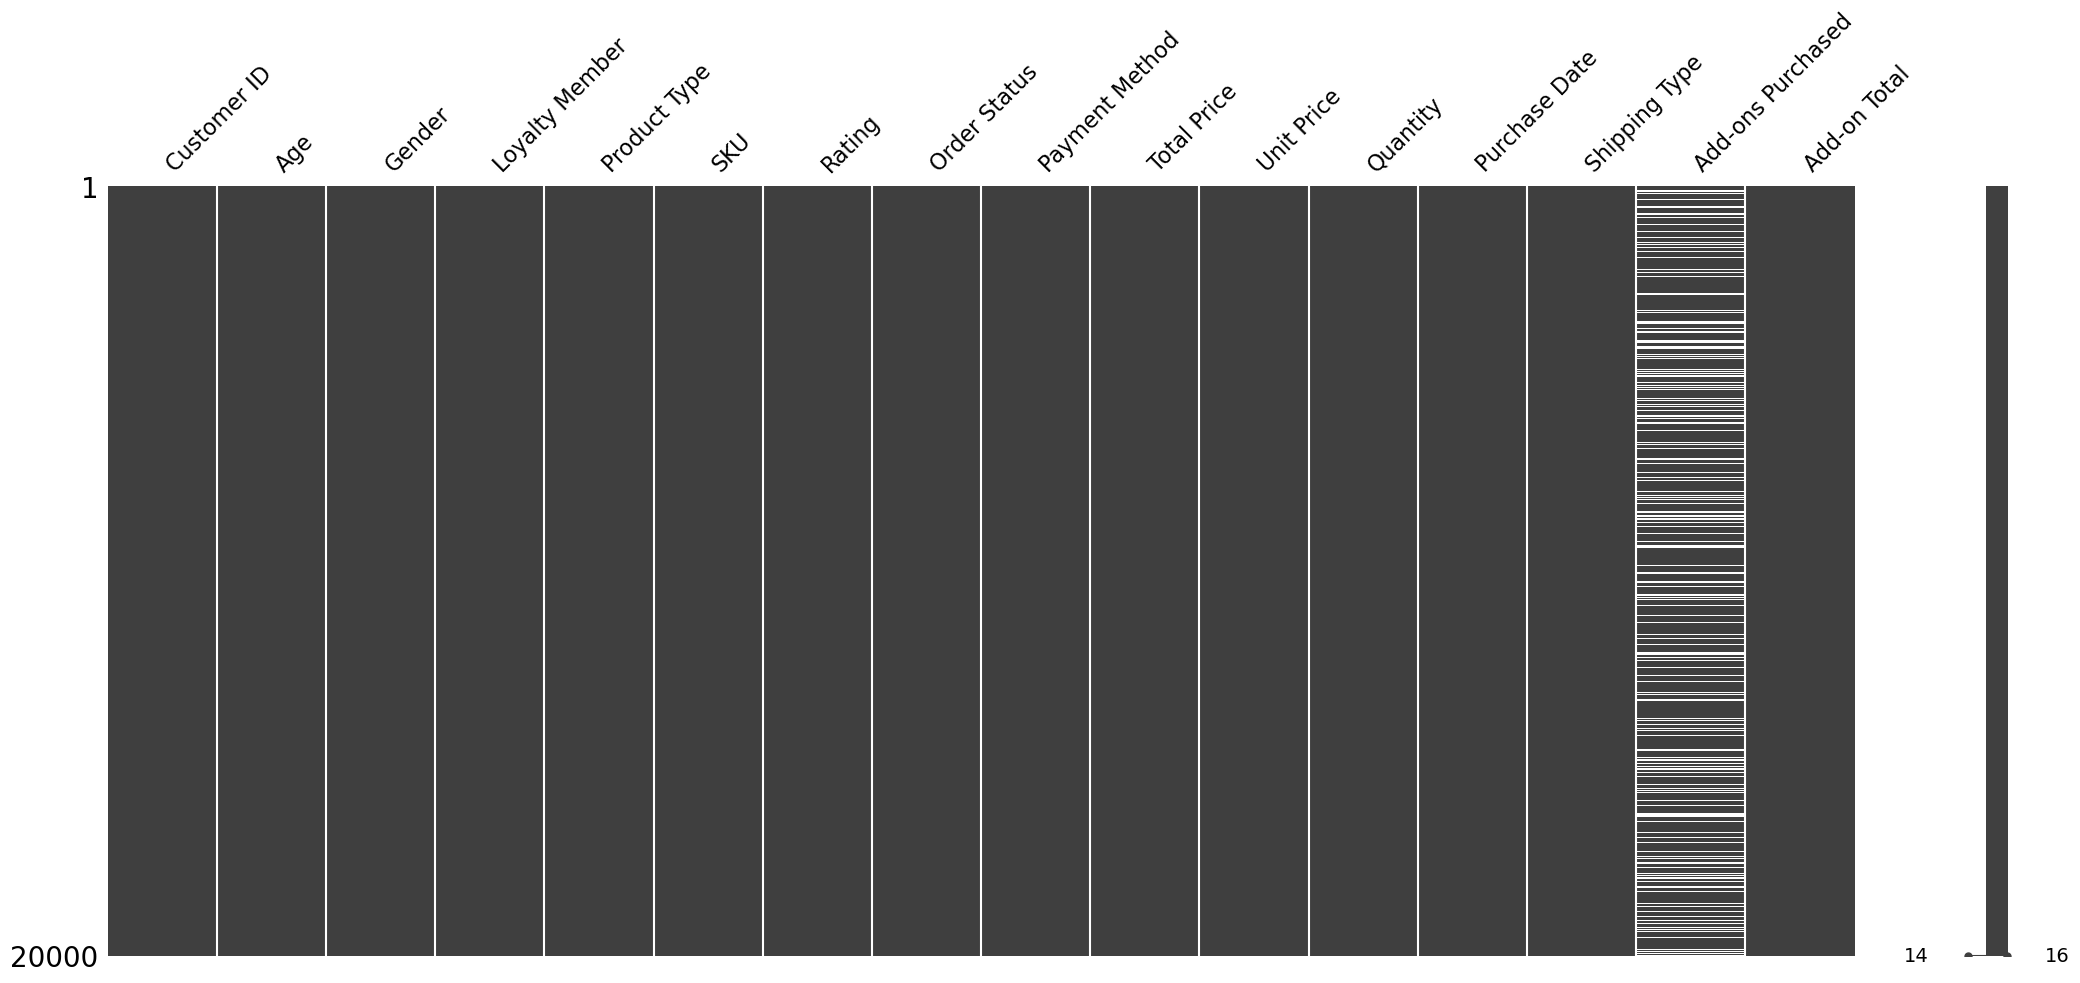

In [3]:
print(df.info())
print(df.isnull().sum())
print(df.head())
msno.matrix(df)

In [4]:
df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna('None')
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64


<Axes: >

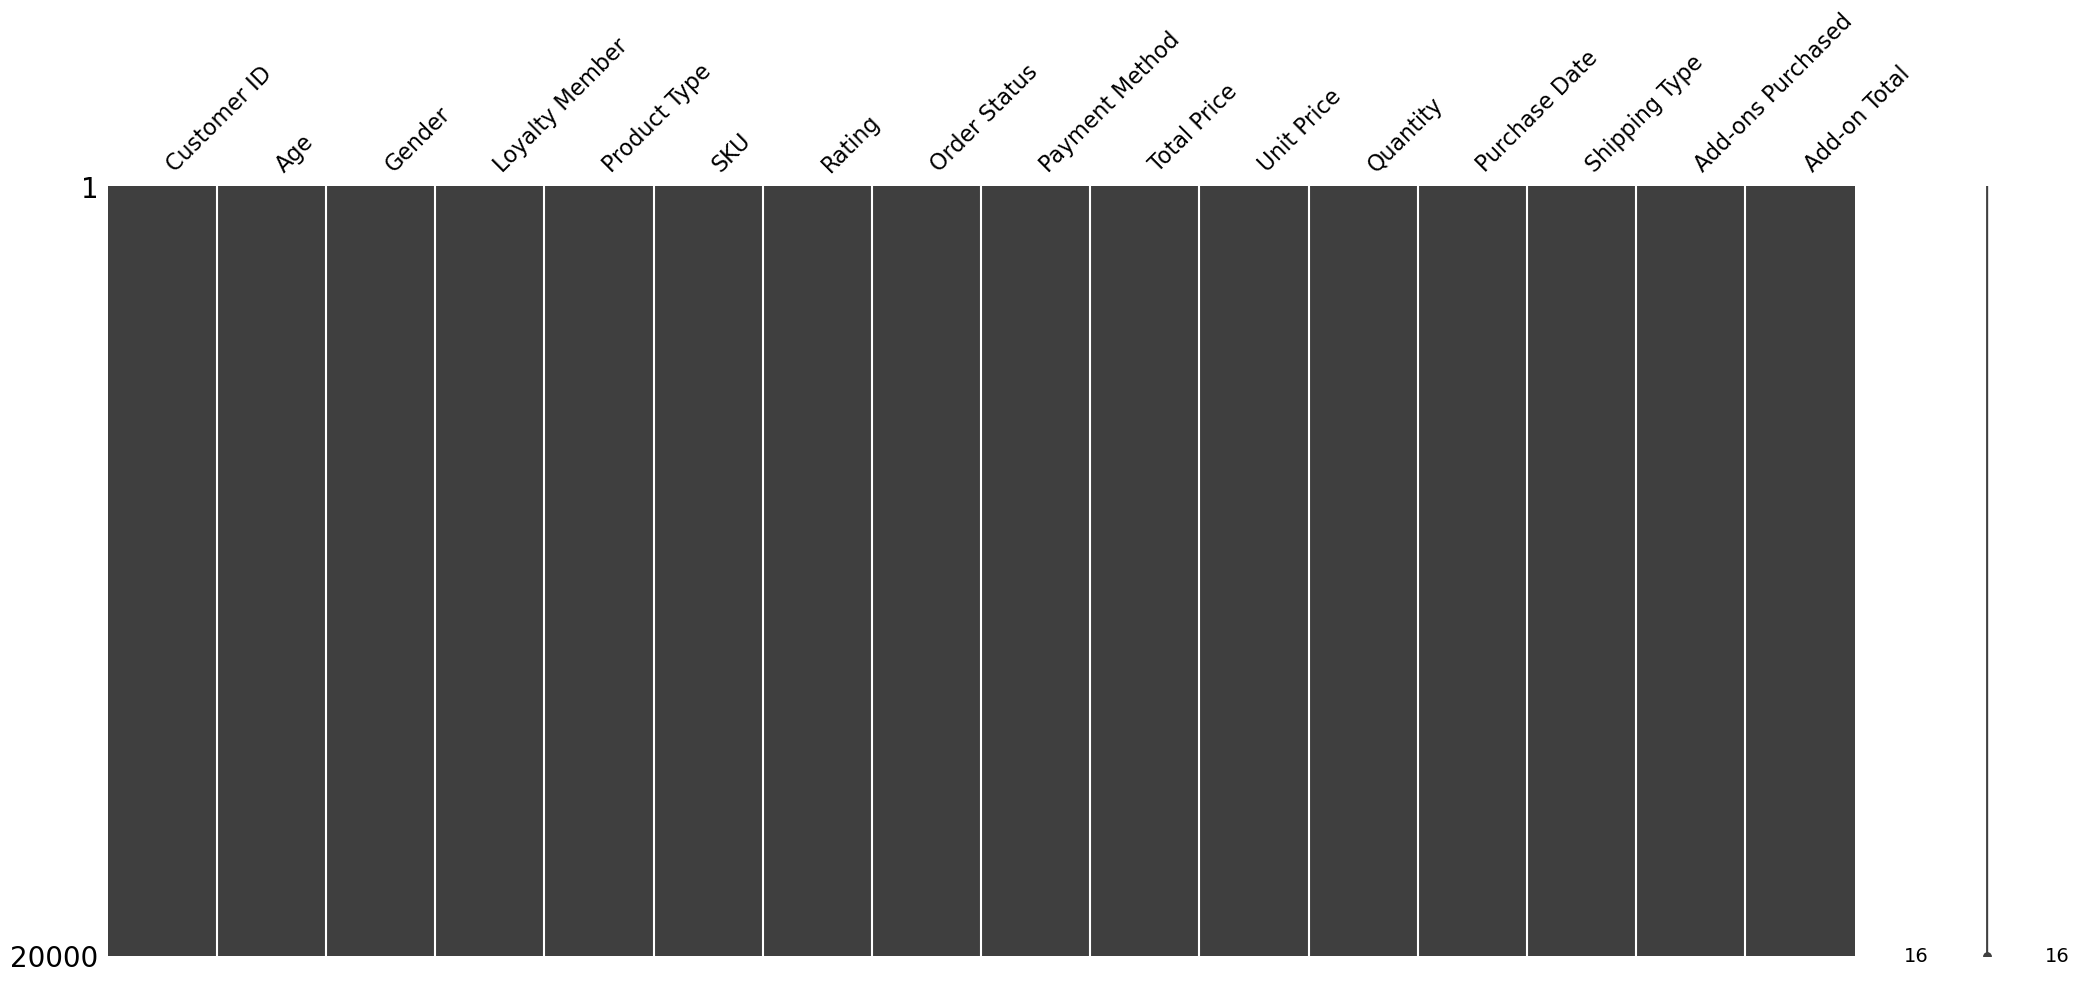

In [5]:
print(df.isnull().sum())
msno.matrix(df)


In [6]:
print(df.describe())


        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   

           Quantity                  Purchase Date  Add-on Total  
count  20000.000000                          20000  20000.000000  
mean       5.485550  2024-04-18 10:42:18.720000256     62.244848  
min        1.000000            2023-09-24 00:00:00      0.000000  
25%        3.000000 

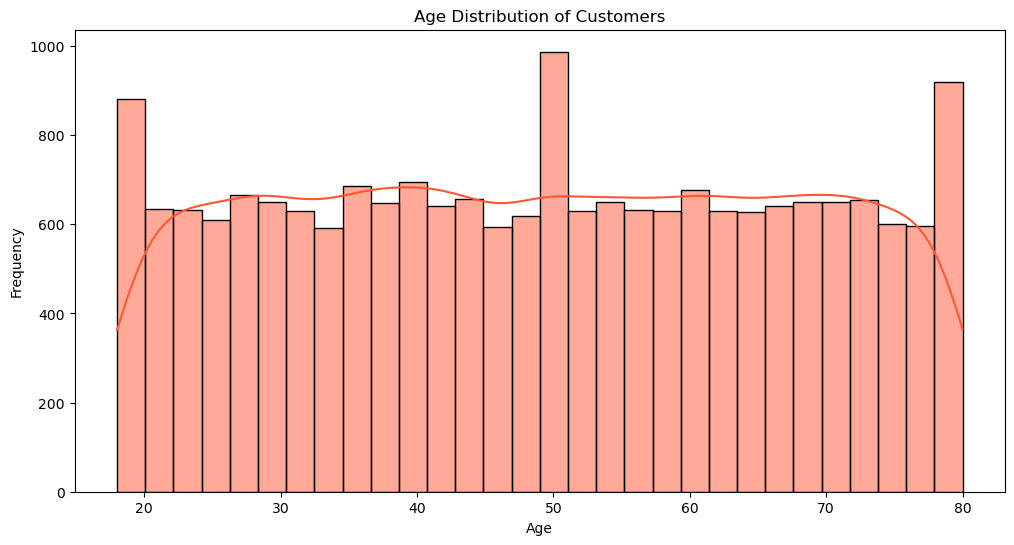

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True,color="#FF5733")
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

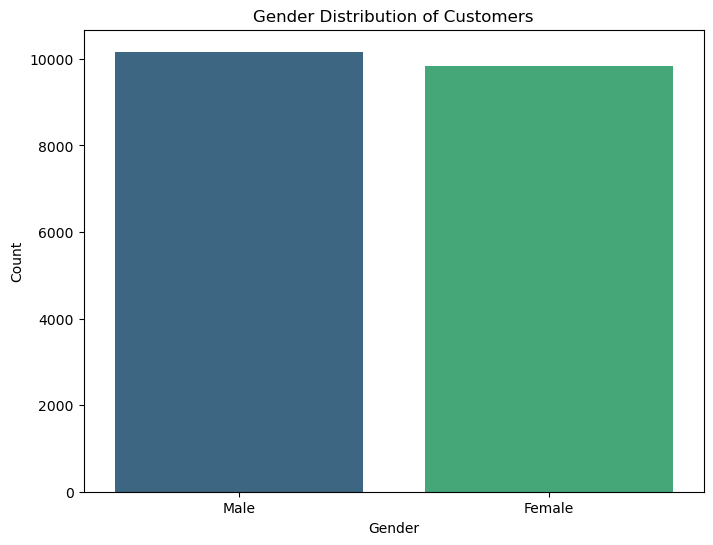

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

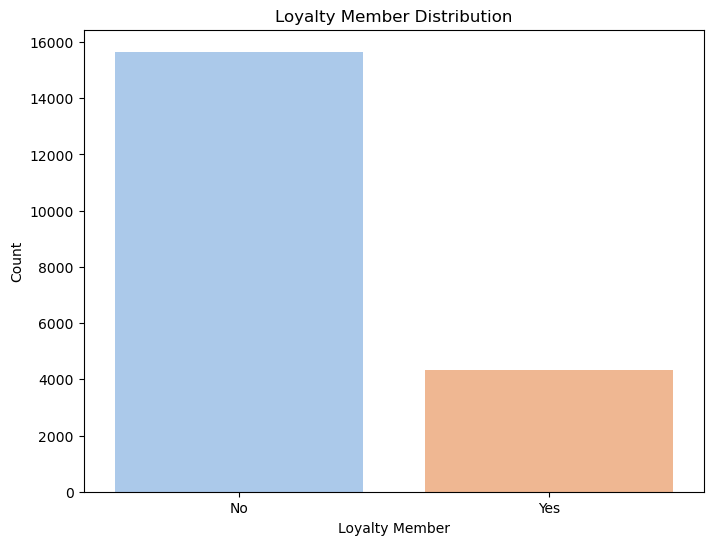

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loyalty Member', data=df, palette='pastel')
plt.title('Loyalty Member Distribution')
plt.xlabel('Loyalty Member')
plt.ylabel('Count')
plt.show()

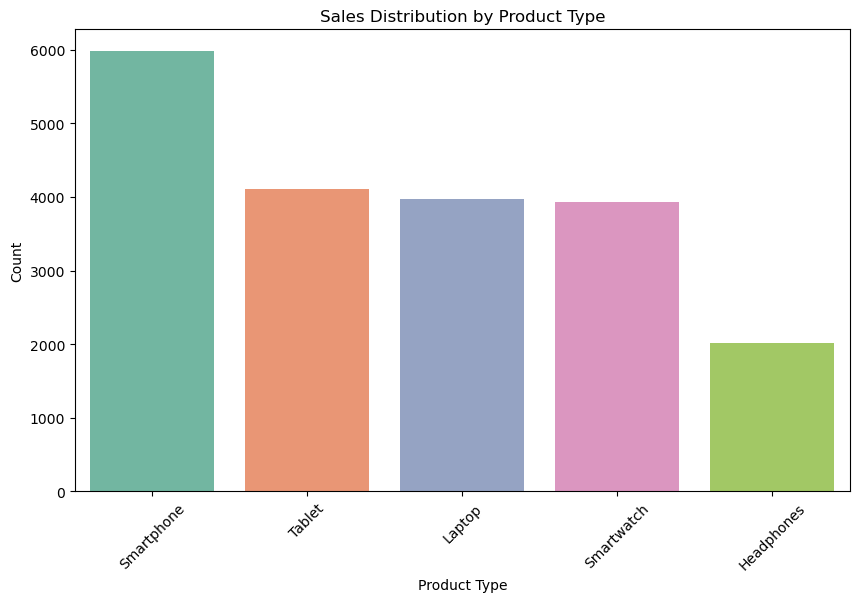

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Type', data=df, order=df['Product Type'].value_counts().index, palette='Set2')
plt.title('Sales Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

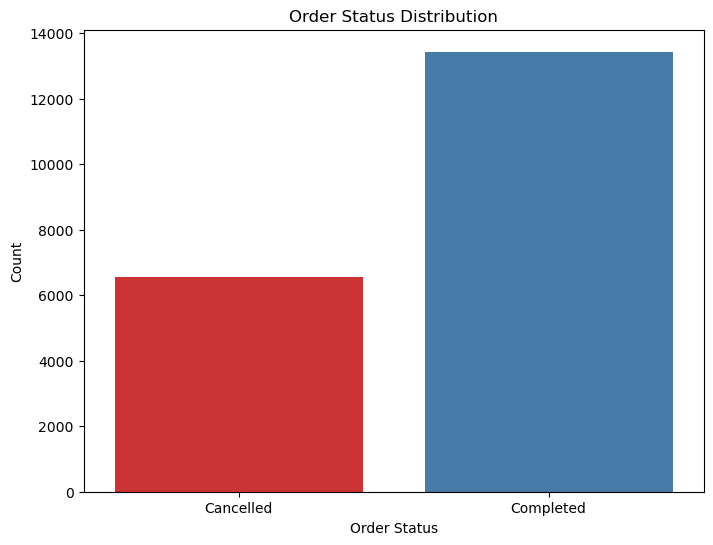

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Order Status', data=df, palette='Set1')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

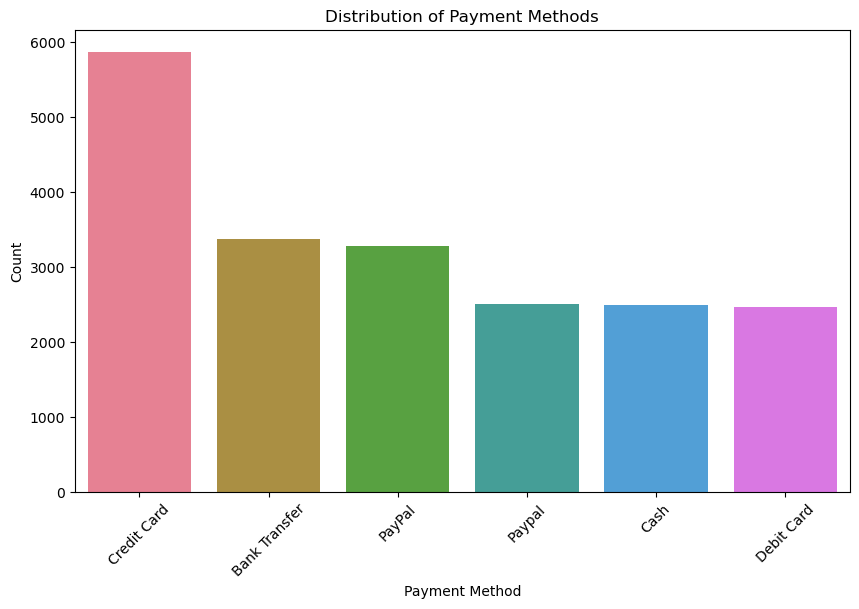

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=df, order=df['Payment Method'].value_counts().index, palette='husl')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

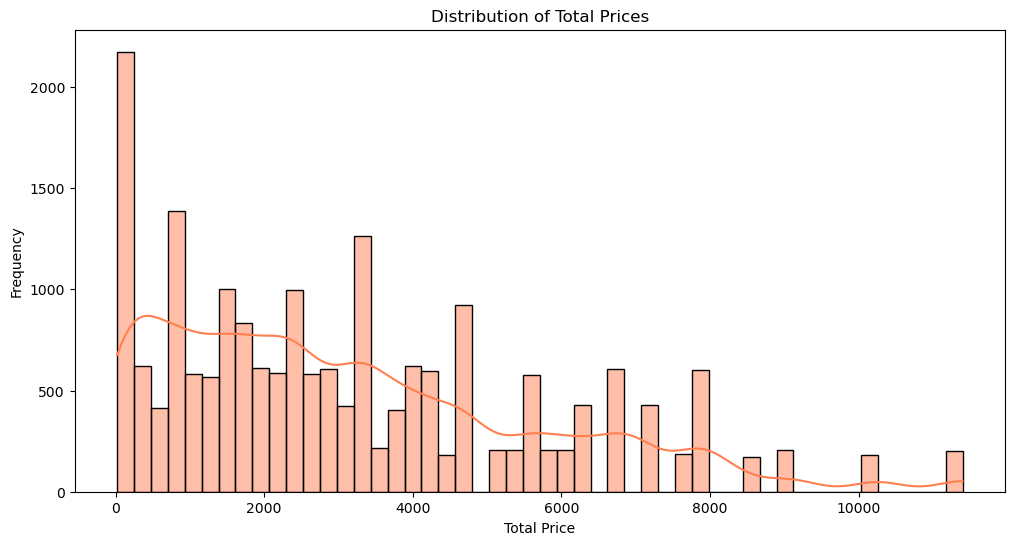

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Total Price'], bins=50, kde=True, color='coral')
plt.title('Distribution of Total Prices')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

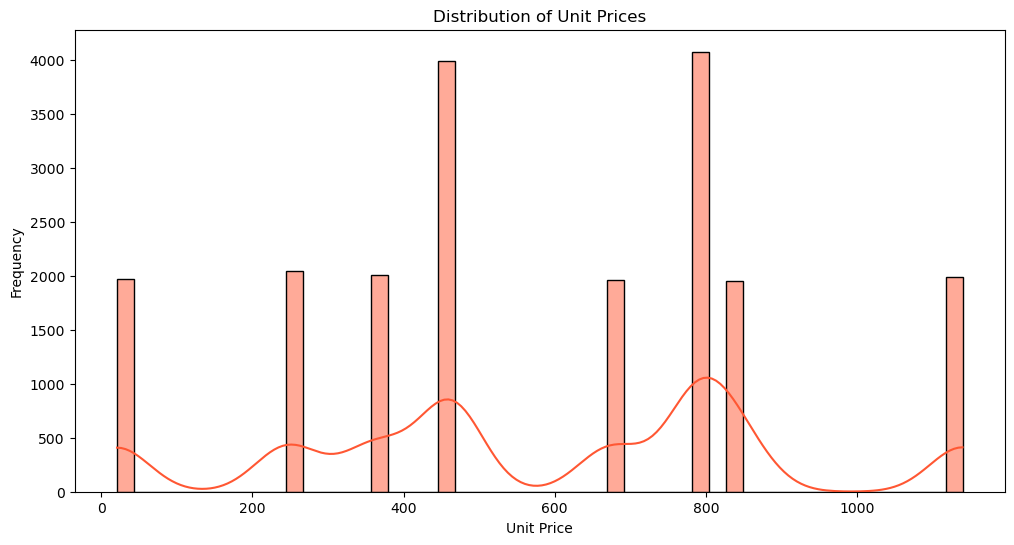

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Unit Price'], bins=50, kde=True, color='#FF5733')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


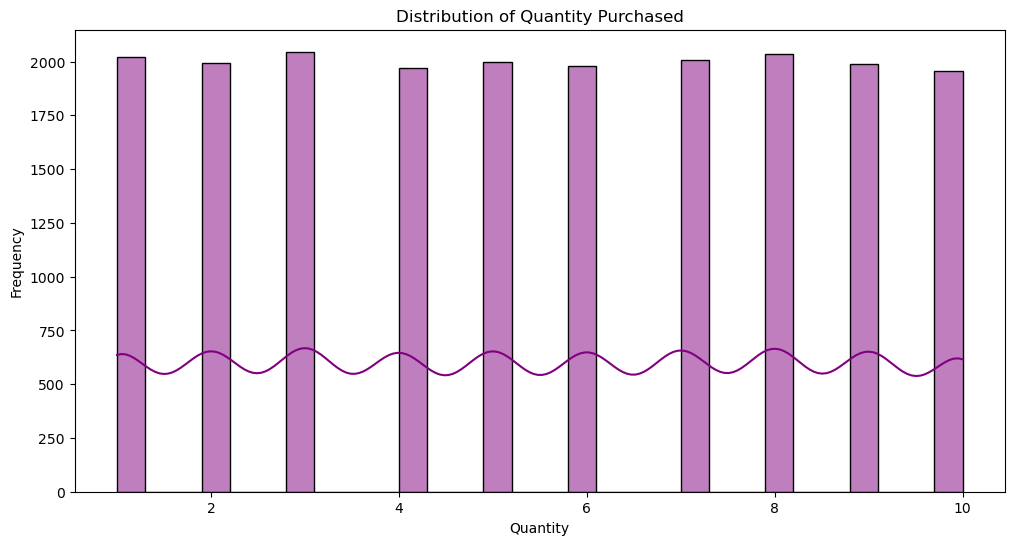

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Quantity'], bins=30, kde=True, color='purple')
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


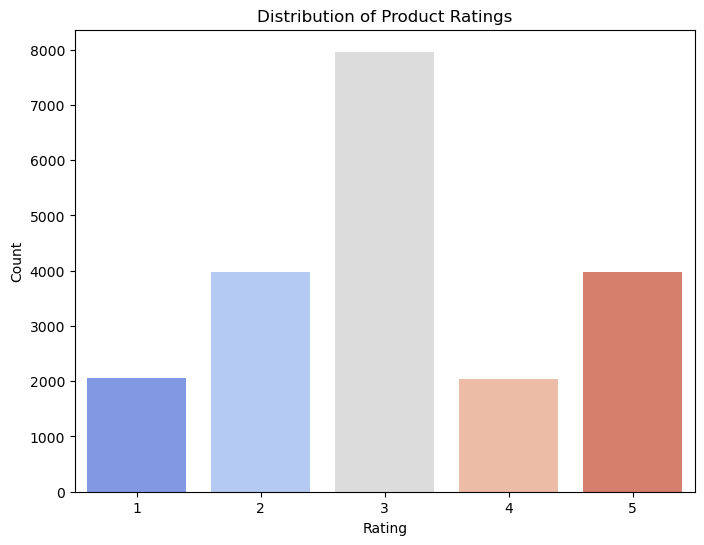

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, palette='coolwarm')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

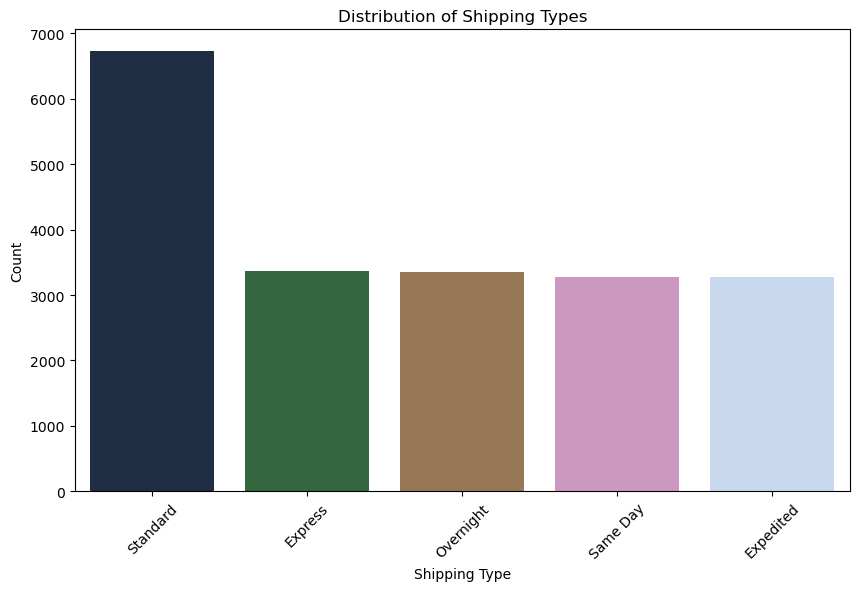

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Type', data=df, order=df['Shipping Type'].value_counts().index, palette='cubehelix')
plt.title('Distribution of Shipping Types')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


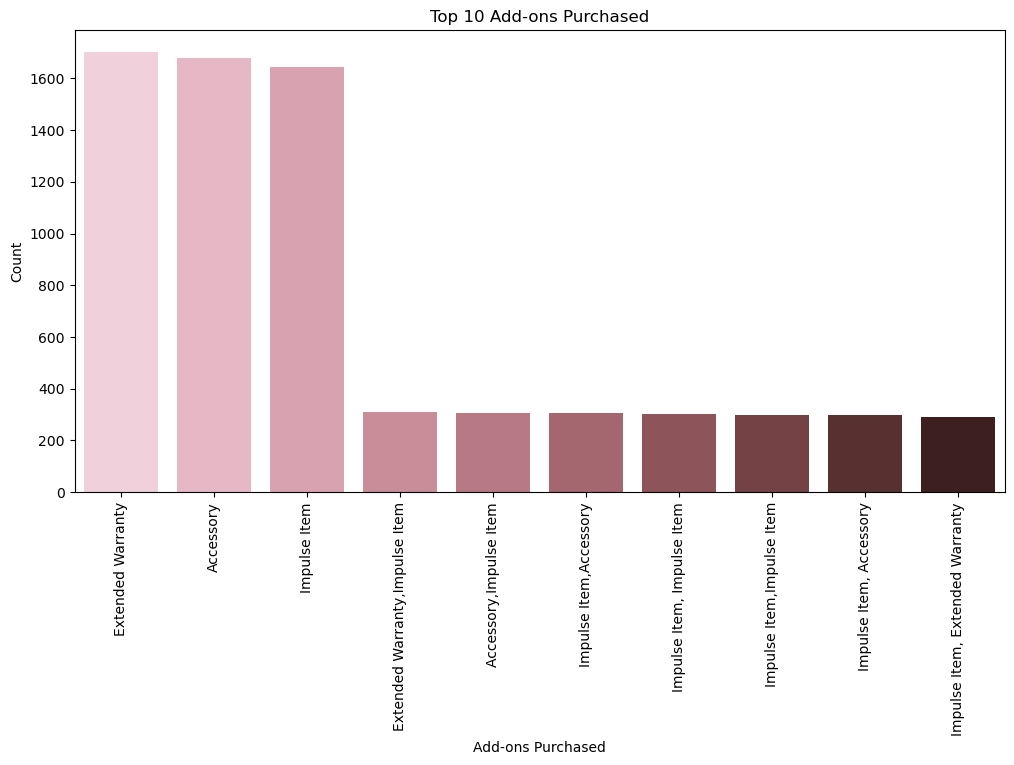

In [18]:
add_ons_filtered = df[df['Add-ons Purchased'] != 'None']
plt.figure(figsize=(12, 6))
sns.countplot(x='Add-ons Purchased', data=add_ons_filtered, order=add_ons_filtered['Add-ons Purchased'].value_counts().index[:10], palette='ch:s=1,r=-.1,h=1')
plt.title('Top 10 Add-ons Purchased')
plt.xlabel('Add-ons Purchased')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

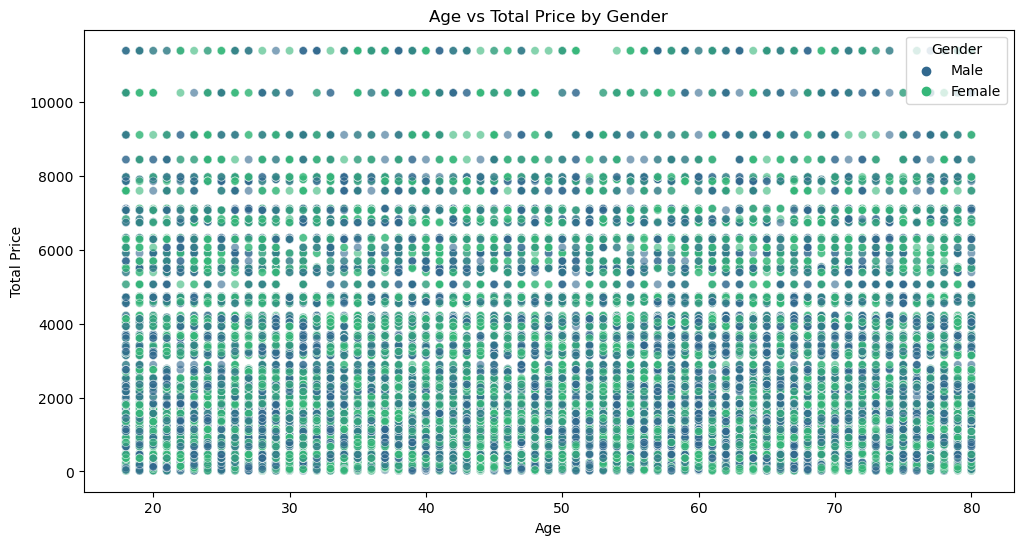

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Total Price', data=df, hue='Gender', palette='viridis', alpha=0.6)
plt.title('Age vs Total Price by Gender')
plt.xlabel('Age')
plt.ylabel('Total Price')
plt.show()


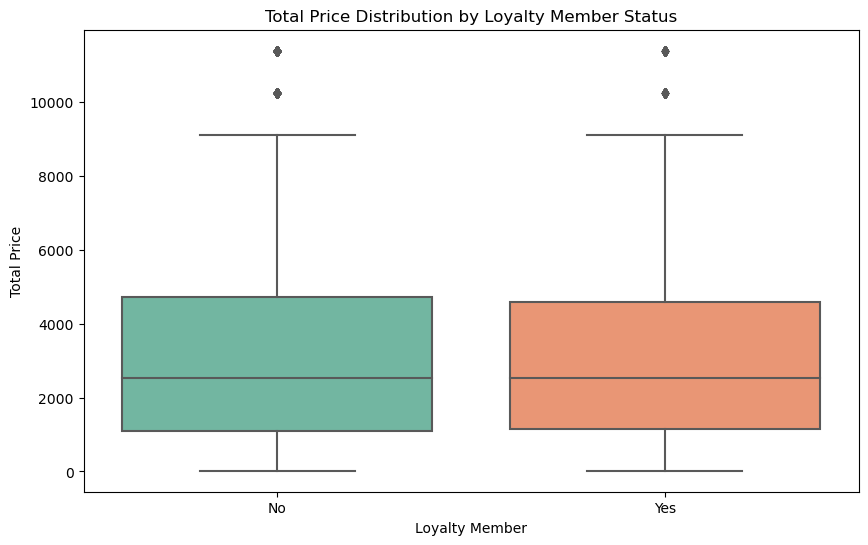

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loyalty Member', y='Total Price', data=df, palette='Set2')
plt.title('Total Price Distribution by Loyalty Member Status')
plt.xlabel('Loyalty Member')
plt.ylabel('Total Price')
plt.show()

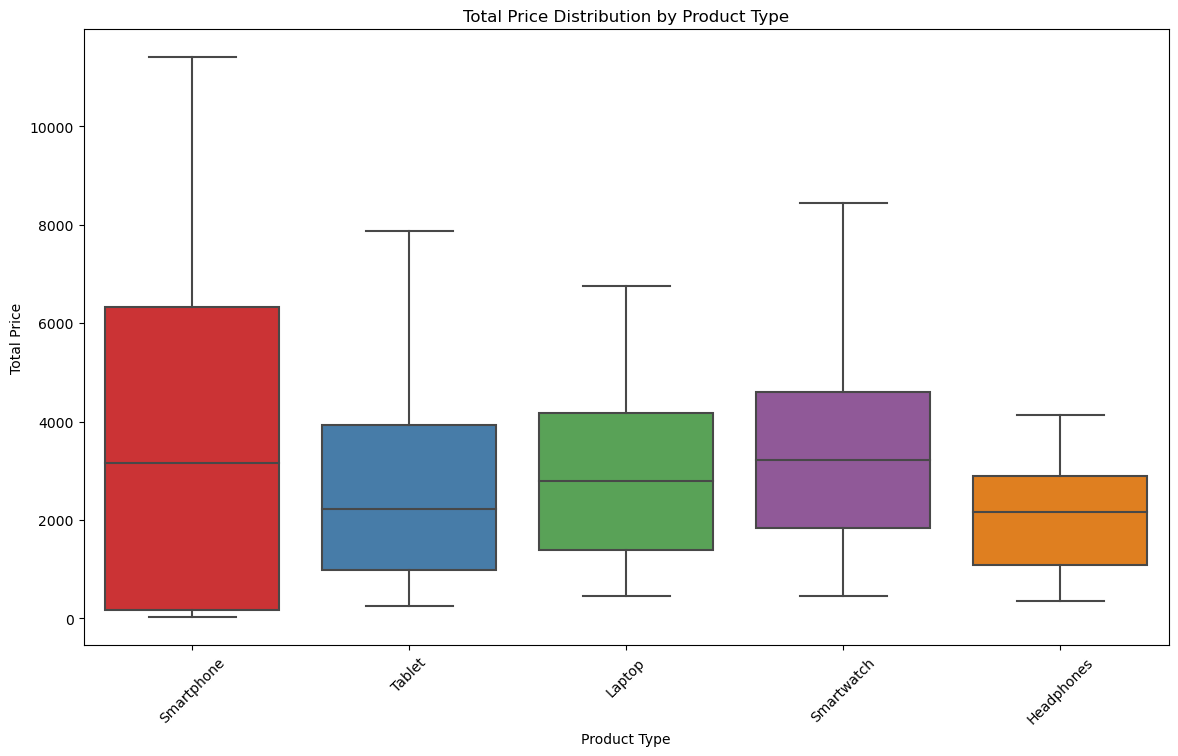

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product Type', y='Total Price', data=df, palette='Set1')
plt.title('Total Price Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()


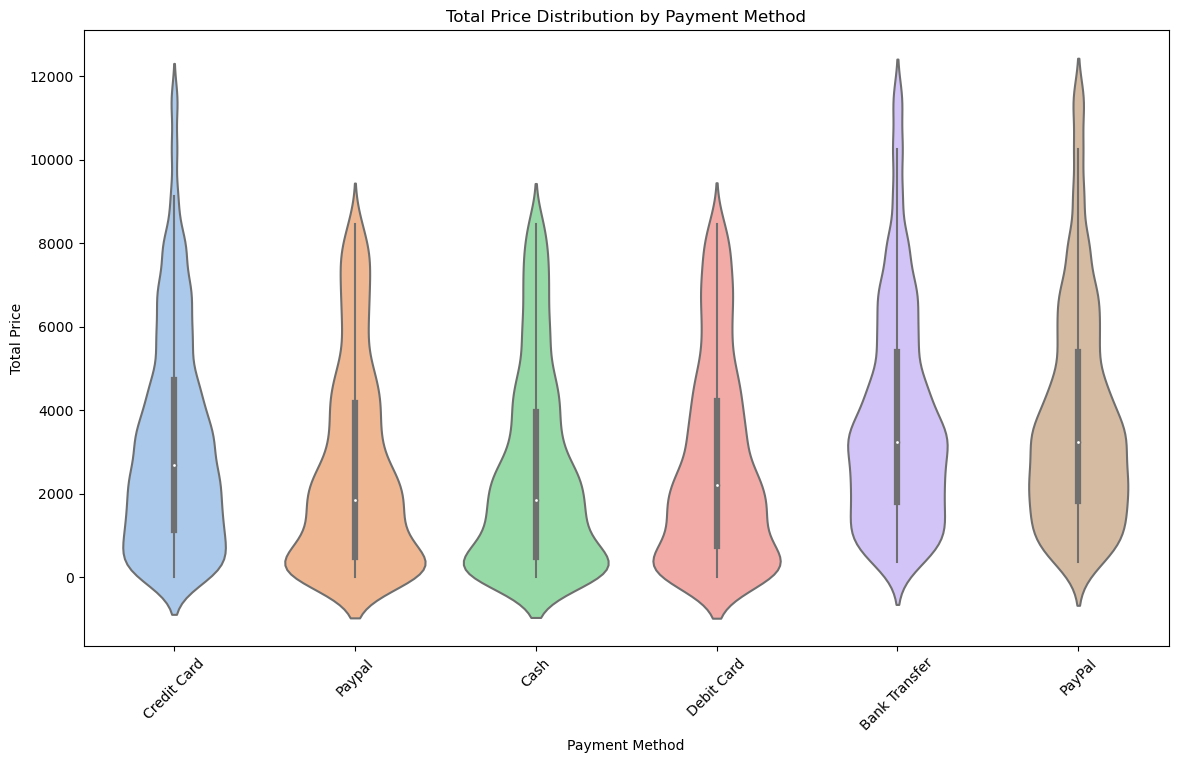

In [22]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Payment Method', y='Total Price', data=df, palette='pastel')
plt.title('Total Price Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

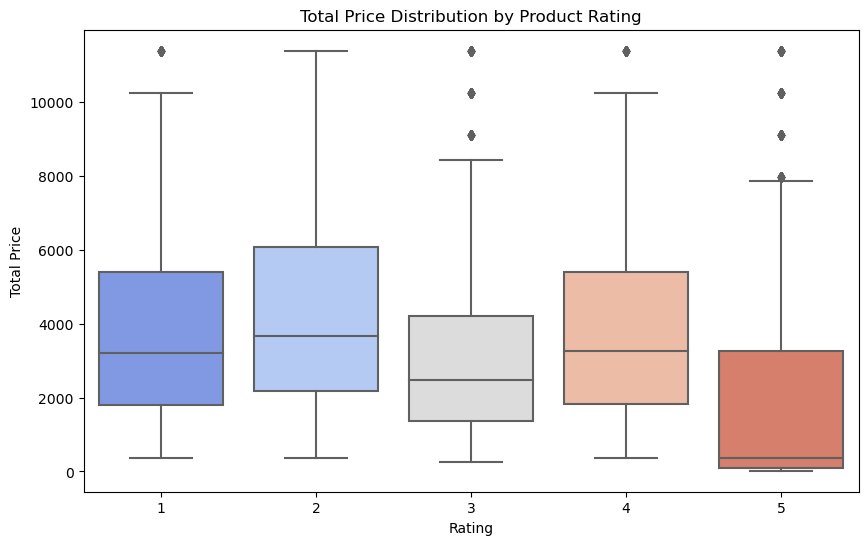

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Total Price', data=df, palette='coolwarm')
plt.title('Total Price Distribution by Product Rating')
plt.xlabel('Rating')
plt.ylabel('Total Price')
plt.show()

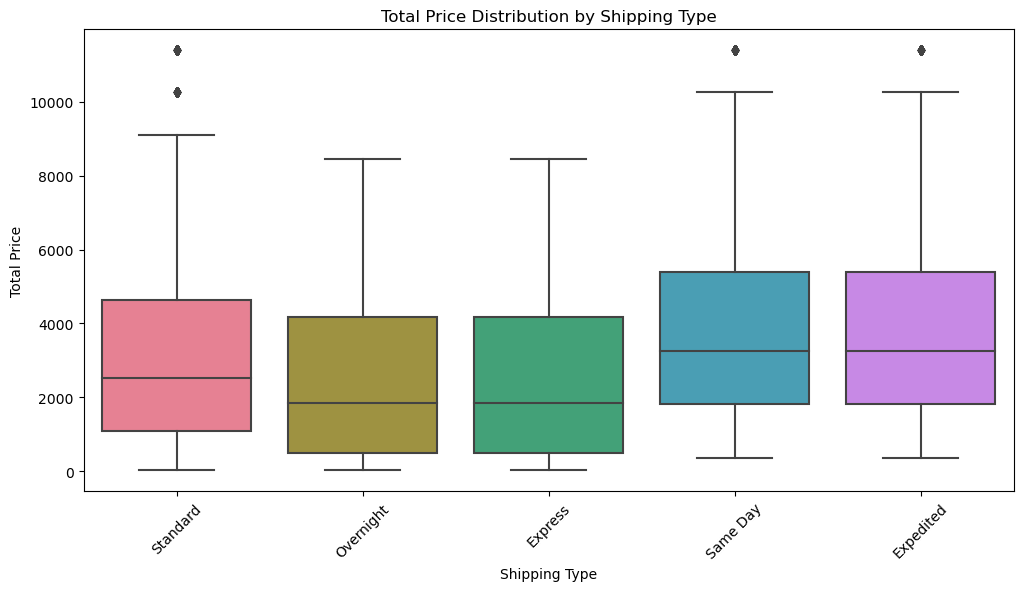

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shipping Type', y='Total Price', data=df, palette='husl')
plt.title('Total Price Distribution by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()


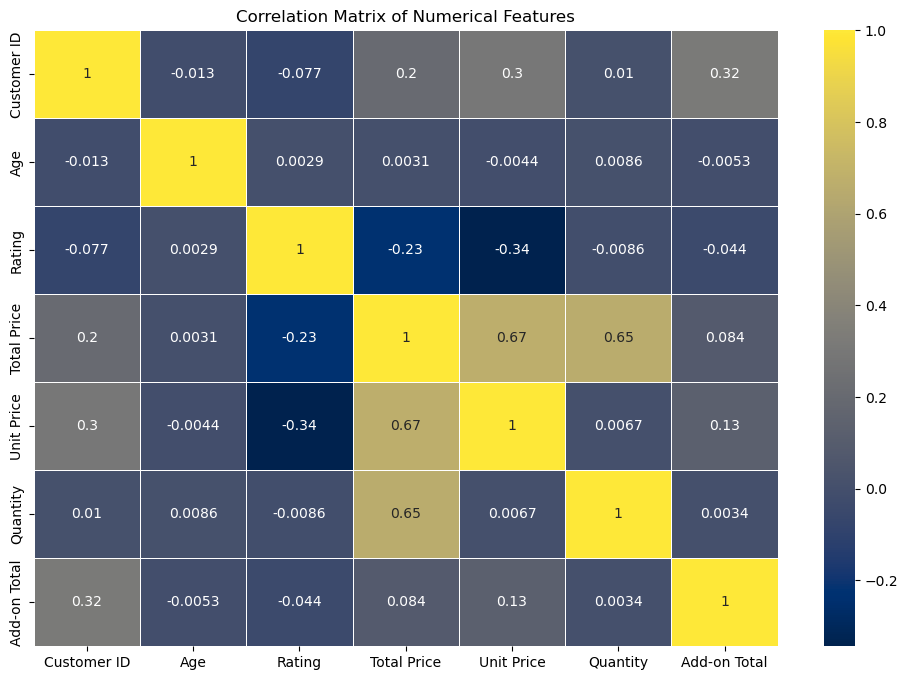

In [25]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


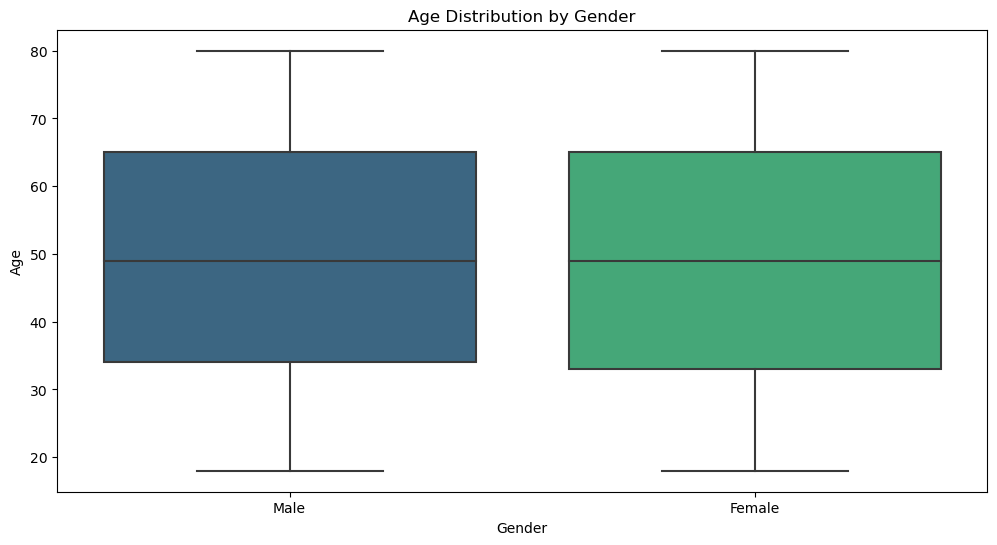

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Age', data=df, palette='viridis')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

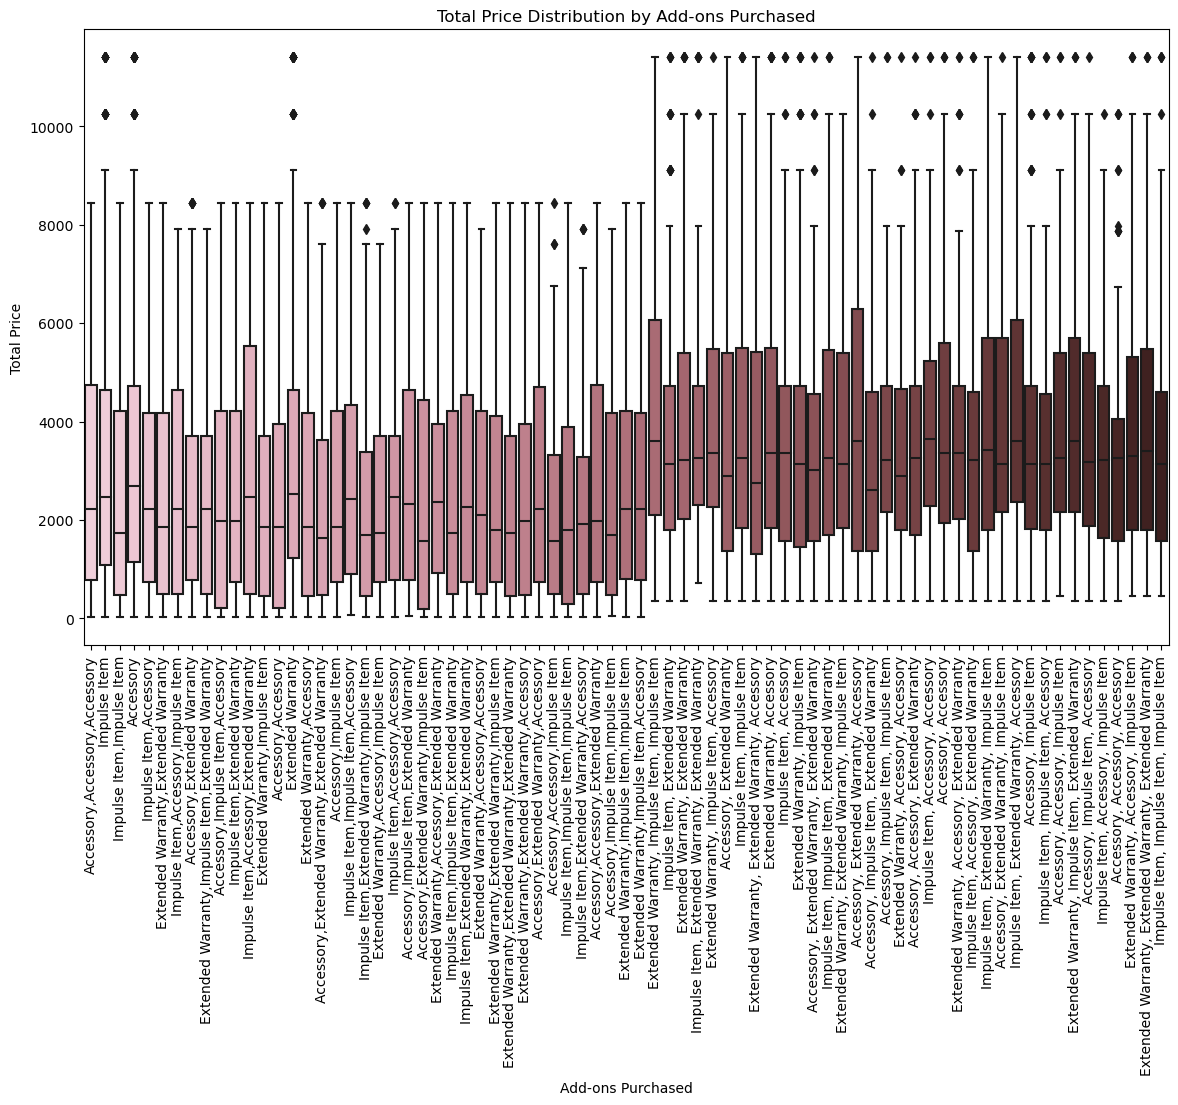

In [27]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Add-ons Purchased', y='Total Price', data=df[df['Add-ons Purchased'] != 'None'], palette='ch:s=1,r=-.1,h=1')
plt.title('Total Price Distribution by Add-ons Purchased')
plt.xlabel('Add-ons Purchased')
plt.ylabel('Total Price')
plt.xticks(rotation=90)
plt.show()

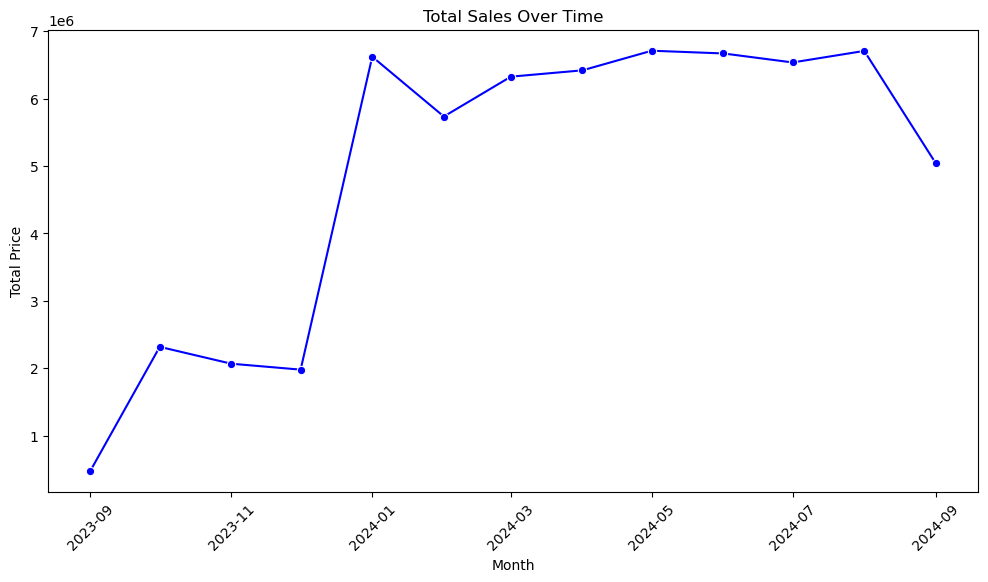

In [28]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['YearMonth'] = df['Purchase Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Total Price'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Total Price', data=monthly_sales, marker='o', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()